In [1]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --user

In [2]:
#!pip install tensorflow_probability 

In [3]:
#tf nightly only version of tf 2.0 with tensorboard support
#!pip install tf-nightly --user

In [4]:
#data from https://www.kaggle.com/mlg-ulb/creditcardfraud

In [5]:
#open tensorboard
#!python -m tensorboard.main --logdir=/path/to/logs


In [6]:
import pandas as pd
import h2o
import pandas_profiling
from pandas_profiling import ProfileReport
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import TensorBoard
import os
import matplotlib.pyplot as plt
SEED=42


In [7]:
plt.style.use('ggplot')

def plot_history(history):
    mean_absolute_error = history['mean_absolute_error']
   
    loss = history['loss']
    
    x = range(1, len(mean_absolute_error) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, mean_absolute_error, 'r', label='Training error')
    plt.title('Loss and accuracy')
    plt.legend()
    
    

In [8]:
df=pd.read_csv("creditcard.csv")

In [9]:
#profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}},plot ={'histogram':{'bayesian_blocks_bins': False}})

In [10]:
#profile.to_file(output_file="credit_report.html")

In [11]:

h2o.init(min_mem_size='20G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.241-b07, mixed mode)
  Starting server from C:\Users\Michael Lanier\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\MICHAE~1\AppData\Local\Temp\tmp0f_1vfjw
  JVM stdout: C:\Users\MICHAE~1\AppData\Local\Temp\tmp0f_1vfjw\h2o_Michael_Lanier_started_from_python.out
  JVM stderr: C:\Users\MICHAE~1\AppData\Local\Temp\tmp0f_1vfjw\h2o_Michael_Lanier_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,27 days
H2O cluster name:,H2O_from_python_Michael_Lanier_3tlytz
H2O cluster total nodes:,1
H2O cluster free memory:,19.17 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [12]:
data=h2o.import_file("creditcard.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [13]:
data

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
1,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
1,-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
2,-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0
2,-0.425966,0.960523,1.14111,-0.168252,0.420987,-0.0297276,0.476201,0.260314,-0.568671,-0.371407,1.34126,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.0581328,0.0686531,-0.0331938,0.0849677,-0.208254,-0.559825,-0.0263977,-0.371427,-0.232794,0.105915,0.253844,0.0810803,3.67,0
4,1.22966,0.141004,0.0453708,1.20261,0.191881,0.272708,-0.005159,0.0812129,0.46496,-0.0992543,-1.41691,-0.153826,-0.751063,0.167372,0.0501436,-0.443587,0.00282051,-0.611987,-0.045575,-0.219633,-0.167716,-0.27071,-0.154104,-0.780055,0.750137,-0.257237,0.0345074,0.00516777,4.99,0
7,-0.644269,1.41796,1.07438,-0.492199,0.948934,0.428118,1.12063,-3.80786,0.615375,1.24938,-0.619468,0.291474,1.75796,-1.32387,0.686133,-0.076127,-1.22213,-0.358222,0.324505,-0.156742,1.94347,-1.01545,0.0575035,-0.649709,-0.415267,-0.0516343,-1.20692,-1.08534,40.8,0
7,-0.894286,0.286157,-0.113192,-0.271526,2.6696,3.72182,0.370145,0.851084,-0.392048,-0.41043,-0.705117,-0.110452,-0.286254,0.0743554,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.0527357,-0.0734251,-0.268092,-0.204233,1.01159,0.373205,-0.384157,0.0117474,0.142404,93.2,0
9,-0.338262,1.11959,1.04437,-0.222187,0.499361,-0.246761,0.651583,0.0695386,-0.736727,-0.366846,1.01761,0.83639,1.00684,-0.443523,0.150219,0.739453,-0.54098,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.38505,-0.069733,0.0941988,0.246219,0.0830756,3.68,0


In [14]:
x=data.columns
C=data['Class']
x.remove('Class')


In [15]:
fraud_dl =H2OAutoEncoderEstimator(hidden = [10,10], epochs = 10, activation='Tanh',seed=SEED)
fraud_anon = fraud_dl.train(x=x,training_frame=data)


deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [16]:
fraud_dl

Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1583294950982_1


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 750 weights/biases, 17.5 KB, 2,900,834 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,0,,,,,,,,,
1,,2,10,Tanh,0,0,0,0.876834,0.145978,0,-0.00445448,0.781143,-0.0221117,0.18471
2,,3,10,Tanh,0,0,0,0.125431,0.0421103,0,0.0312271,0.204813,-0.0170112,0.0482499
3,,4,30,Tanh,,0,0,0.062722,0.0326231,0,0.00303805,0.0945551,-0.00527475,0.0521868




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.00039096426497056073
RMSE: 0.01977281631357963

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2020-03-03 22:09:16,1.091 sec,0.00000 obs/sec,0.000000,0,0.0,0.090335,0.008160
1,,2020-03-03 22:09:22,6.324 sec,191820 obs/sec,3.513032,10,1000536.0,0.024011,0.000577
2,,2020-03-03 22:09:27,12.462 sec,181747 obs/sec,6.670514,19,1899809.0,0.023558,0.000555
3,,2020-03-03 22:09:33,17.742 sec,184507 obs/sec,10.185262,29,2900834.0,0.019773,0.000391



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,V9,1.000000,1.000000,0.110457
1,V18,0.861280,0.861280,0.095134
2,V19,0.840541,0.840541,0.092843
3,V11,0.819380,0.819380,0.090506
4,V15,0.736666,0.736666,0.081370
5,V26,0.732399,0.732399,0.080898
6,V24,0.697082,0.697082,0.076997
7,V13,0.673406,0.673406,0.074382
8,V4,0.649554,0.649554,0.071748
9,Time,0.564765,0.564765,0.062382



See the whole table with table.as_data_frame()


In [17]:
sh = fraud_dl.score_history()


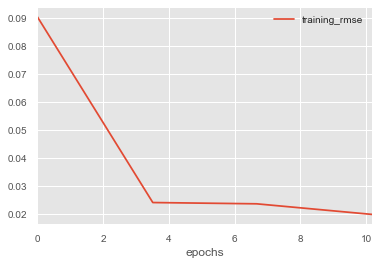

In [18]:
%matplotlib inline 
# plot training logloss and auc
sh.plot(x='epochs', y = ['training_rmse'])

In [19]:
err=(fraud_dl.anomaly(data)).cbind(C)

In [20]:
err

Reconstruction.MSE,Class
0.000122688,0
0.000101776,0
0.000598604,0
0.00011135,0
0.000262742,0
4.23423e-05,0
6.60165e-05,0
0.000398629,0
9.75006e-05,0
8.28065e-05,0


In [21]:
err=err.as_data_frame()

In [22]:
err=tf.cast(err.values, tf.float32)

In [23]:
np.average(err[:,0])

0.00038484595

In [24]:
#find correlation between reconstruction error and fraud flag

tfp.stats.correlation(
    err, y=None, sample_axis=0, event_axis=-1, keepdims=False, name=None
)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.        , 0.45944107],
       [0.45944107, 0.9999914 ]], dtype=float32)>

In [25]:
#fit a glm to access if reconstruction error is a predictor of fraud

tfp.glm.fit(
    model_matrix=err, response=err[:,1], model=tfp.glm.Bernoulli(), model_coefficients_start=None,
    predicted_linear_response_start=None, l2_regularizer=None, dispersion=None,
    offset=None, convergence_criteria_fn=None, learning_rate=None,
    fast_unsafe_numerics=True, maximum_iterations=1,
    l2_regularization_penalty_factor=None, name=None
)

[<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-517.10144 ,    9.424312], dtype=float32)>,
 <tf.Tensor: shape=(284807,), dtype=float32, numpy=
 array([-0.06344198, -0.05262848, -0.30953917, ..., -0.23271678,
        -0.5250792 , -0.20824815], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>]

In [26]:
def logit2prob(logit):
  odds = tf.exp(logit)
  prob = odds / (1.000 + odds)
  return(prob)
logit2prob(9.456)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9999218>

In [27]:
data=data.scale(center=True,scale=True)
data=np.array(data[:,x].as_data_frame())
data=tf.keras.utils.normalize(
    data, axis=-1, order=2
)

In [28]:
data.shape

(284807, 30)

In [29]:
h2o.shutdown()

C:\Users\Michael Lanier\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.


H2O session _sid_9506 closed.


In [37]:
nb_epoch = 10
batch_size = 128
input_dim = data.shape[1] #num of columns, 30
encoding_dim = 10
hidden_dim = 10 


input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh",kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None))(input_layer)
encoder = Dense(encoding_dim, activation="tanh",kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None))(encoder)

decoder = Dense(input_dim, activation='tanh',kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None))(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [31]:
#logdir="C:\\Users\\Michael Lanier\\notebook\\logs"
#!mkdir 'C:\\Users\\Michael Lanier\\notebook\\logs\\train'
#!tensorboard --logdir "C:\Users\Michael Lanier\notebook\logs"

In [38]:
keras.backend.clear_session()

In [39]:

autoencoder.compile(metrics=['mean_absolute_error'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               #save_best_only=True,
                               verbose=1)



history = autoencoder.fit(data, data,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    verbose=1,
                    callbacks=[cp]).history

Train on 284807 samples
Epoch 1/10
283008/284807 [============================>.] - ETA: 8:20 - loss: 0.0333 - mean_absolute_error: 0.139 - ETA: 33s - loss: 0.0332 - mean_absolute_error: 0.139 - ETA: 19s - loss: 0.0330 - mean_absolute_error: 0.13 - ETA: 15s - loss: 0.0328 - mean_absolute_error: 0.13 - ETA: 12s - loss: 0.0324 - mean_absolute_error: 0.13 - ETA: 11s - loss: 0.0318 - mean_absolute_error: 0.13 - ETA: 10s - loss: 0.0311 - mean_absolute_error: 0.13 - ETA: 9s - loss: 0.0304 - mean_absolute_error: 0.1323 - ETA: 9s - loss: 0.0297 - mean_absolute_error: 0.130 - ETA: 8s - loss: 0.0291 - mean_absolute_error: 0.129 - ETA: 8s - loss: 0.0284 - mean_absolute_error: 0.127 - ETA: 8s - loss: 0.0279 - mean_absolute_error: 0.126 - ETA: 7s - loss: 0.0273 - mean_absolute_error: 0.124 - ETA: 7s - loss: 0.0268 - mean_absolute_error: 0.123 - ETA: 7s - loss: 0.0262 - mean_absolute_error: 0.121 - ETA: 6s - loss: 0.0257 - mean_absolute_error: 0.120 - ETA: 6s - loss: 0.0253 - mean_absolute_error: 0.

283904/284807 [============================>.] - ETA: 8s - loss: 0.0137 - mean_absolute_error: 0.078 - ETA: 6s - loss: 0.0135 - mean_absolute_error: 0.079 - ETA: 6s - loss: 0.0136 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0136 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0136 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0136 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0136 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0136 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0137 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0137 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0137 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0137 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0137 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_abs

284288/284807 [============================>.] - ETA: 11s - loss: 0.0123 - mean_absolute_error: 0.07 - ETA: 6s - loss: 0.0139 - mean_absolute_error: 0.0809 - ETA: 6s - loss: 0.0140 - mean_absolute_error: 0.081 - ETA: 6s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 6s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0139 - mean_ab

283008/284807 [============================>.] - ETA: 8s - loss: 0.0129 - mean_absolute_error: 0.077 - ETA: 6s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_abs

284032/284807 [============================>.] - ETA: 8s - loss: 0.0132 - mean_absolute_error: 0.079 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0137 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_abs

282880/284807 [============================>.] - ETA: 8s - loss: 0.0144 - mean_absolute_error: 0.081 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_abs

284800/284807 [============================>.] - ETA: 6s - loss: 0.0137 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0138 - mean_abs

283264/284807 [============================>.] - ETA: 8s - loss: 0.0132 - mean_absolute_error: 0.078 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_abs

284544/284807 [============================>.] - ETA: 8s - loss: 0.0150 - mean_absolute_error: 0.083 - ETA: 5s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0139 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_abs

284032/284807 [============================>.] - ETA: 11s - loss: 0.0138 - mean_absolute_error: 0.08 - ETA: 5s - loss: 0.0140 - mean_absolute_error: 0.0807 - ETA: 5s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 5s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 5s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 5s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 5s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 5s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 5s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 5s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 5s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 5s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 5s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.079 - ETA: 4s - loss: 0.0137 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_absolute_error: 0.080 - ETA: 4s - loss: 0.0138 - mean_ab

In [40]:
loss, accuracy = autoencoder.evaluate(data, data, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))


Training Accuracy: 0.0800


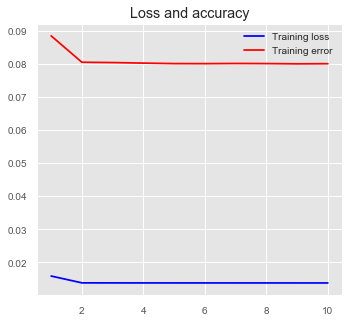

In [41]:

plot_history(history)

In [42]:

data_predictions = autoencoder.predict(data)
mse = np.mean(np.power(data - data_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'Class': err[:,1]})
error_df.describe()

,Reconstruction_error,Class
count,284807.000000,284807.000000
mean,0.013783,0.001727
std,0.008946,0.041494
min,0.000372,0.000000
25%,0.005490,0.000000
50%,0.012841,0.000000
75%,0.020976,0.000000
max,0.034662,1.000000


In [43]:
data_predictions

array([[-0.47812313, -0.18336764,  0.06216399, ...,  0.0441631 ,
         0.04368399, -0.00522644],
       [-0.44274208,  0.13033065,  0.03687496, ..., -0.00885831,
        -0.00408332, -0.06848453],
       [-0.30515006, -0.11340678, -0.00397376, ...,  0.02801088,
         0.02643741,  0.01251646],
       ...,
       [ 0.31389302,  0.19075595, -0.06427637, ..., -0.01194388,
        -0.01527938, -0.00965813],
       [ 0.16245097, -0.04857536,  0.01268354, ...,  0.00838079,
         0.01002526, -0.00740322],
       [ 0.37988597, -0.11056438,  0.15161991, ...,  0.06949066,
         0.0435469 , -0.0481507 ]], dtype=float32)

In [44]:
data

array([[-0.53016041, -0.18434485, -0.01170339, ...,  0.08786293,
        -0.01693606,  0.06504631],
       [-0.60603262,  0.18469987,  0.04892252, ..., -0.00675537,
         0.01353994, -0.10395297],
       [-0.29521237, -0.10254123, -0.12000019, ..., -0.0202771 ,
        -0.0267658 ,  0.17161944],
       ...,
       [ 0.33761922,  0.20151047, -0.03751165, ...,  0.00226935,
        -0.0165455 , -0.01682763],
       [ 0.2799623 , -0.02093023,  0.05477432, ...,  0.04596843,
         0.05399622, -0.05340998],
       [ 0.4476601 , -0.07424324, -0.03132392, ..., -0.00163135,
         0.01127289,  0.14022427]])

In [45]:


err=tf.cast(error_df.values, tf.float32)
print(np.average(err[:,0]))

tfp.stats.correlation(
    err, y=None, sample_axis=0, event_axis=-1, keepdims=False, name=None
)

0.013782585


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.9999999 , 0.08043329],
       [0.08043329, 0.9999914 ]], dtype=float32)>